In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = 'data/train'
val_dir = 'data/test'

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),   # Resize images to 150x150 (or your CNN input size)
    batch_size=32,
    class_mode='binary'  # Use 'binary' if you have 2 classes
)

test_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [6]:
import numpy as np

In [7]:
x_train = []
y_train = []
for i in range(len(train_generator)):
    x_batch, y_batch = train_generator[i]
    x_train.append(x_batch)
    y_train.append(y_batch)
x_train = np.concatenate(x_train)
y_train = np.concatenate(y_train)

x_test = []
y_test = []
for j in range(len(test_generator)):
    x_tbatch, y_tbatch = test_generator[j]
    x_test.append(x_tbatch)
    y_test.append(y_tbatch)
x_test = np.concatenate(x_test)
y_test = np.concatenate(y_test)

print('x_train shape:',x_train.shape,'x_test shape:',x_test.shape)
print('y_train shape:',y_train.shape,'y_test shape:',y_test.shape)

x_train shape: (8005, 150, 150, 3) x_test shape: (2023, 150, 150, 3)
y_train shape: (8005,) y_test shape: (2023,)


In [8]:
x_train[1]

array([[[0.82745105, 0.5921569 , 0.45882356],
        [0.82745105, 0.5882353 , 0.4666667 ],
        [0.82745105, 0.59607846, 0.4784314 ],
        ...,
        [0.8235295 , 0.65882355, 0.57254905],
        [0.83921576, 0.6745098 , 0.5882353 ],
        [0.8196079 , 0.654902  , 0.5686275 ]],

       [[0.8313726 , 0.58431375, 0.454902  ],
        [0.8196079 , 0.58431375, 0.45098042],
        [0.82745105, 0.5882353 , 0.4666667 ],
        ...,
        [0.8313726 , 0.6509804 , 0.56078434],
        [0.854902  , 0.6745098 , 0.58431375],
        [0.83921576, 0.65882355, 0.5686275 ]],

       [[0.8235295 , 0.5686275 , 0.4431373 ],
        [0.8196079 , 0.57254905, 0.4431373 ],
        [0.8235295 , 0.5764706 , 0.454902  ],
        ...,
        [0.87843144, 0.6784314 , 0.5647059 ],
        [0.86274517, 0.6627451 , 0.54901963],
        [0.8588236 , 0.65882355, 0.54509807]],

       ...,

       [[0.7960785 , 0.5294118 , 0.38431376],
        [0.7411765 , 0.47450984, 0.32941177],
        [0.7254902 , 0

In [9]:
import matplotlib.pyplot as plt
import random

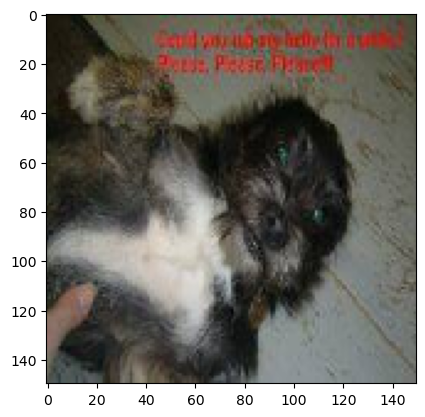

In [10]:
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx])
plt.show()

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [12]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [13]:
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])

In [16]:
model.fit(x_train,y_train,epochs = 5,batch_size = 64)

Epoch 1/5
126/126 [==============================] - 93s 733ms/step - loss: 0.2743 - accuracy: 0.8819
Epoch 2/5
126/126 [==============================] - 86s 686ms/step - loss: 0.1509 - accuracy: 0.9452
Epoch 3/5
126/126 [==============================] - 87s 689ms/step - loss: 0.0792 - accuracy: 0.9751
Epoch 4/5
126/126 [==============================] - 86s 683ms/step - loss: 0.0340 - accuracy: 0.9928
Epoch 5/5
126/126 [==============================] - 78s 616ms/step - loss: 0.0815 - accuracy: 0.9728


model.evaluate(x_test,y_test)

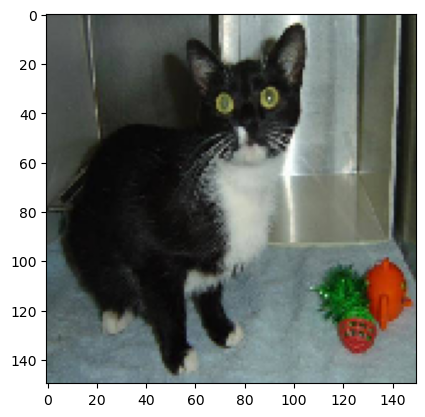

1/1 [==============================] - 0s 14ms/step
our model says it is a: cat


In [136]:
idx2 = random.randint(0,len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1, 150, 150, 3))
y_pred = y_pred > 0.5
if(y_pred == 0):
    pred = 'cat'
else:
    pred = 'dog'
print('our model says it is a:',pred)

In [119]:
import matplotlib.image as mpimg

In [125]:
from PIL import Image

In [130]:
img = Image.open('dog.jpg')
img = img.resize((150, 150))

In [131]:
img = np.array(img) / 255.0

In [132]:
#img = mpimg.imread('dog.jpg')

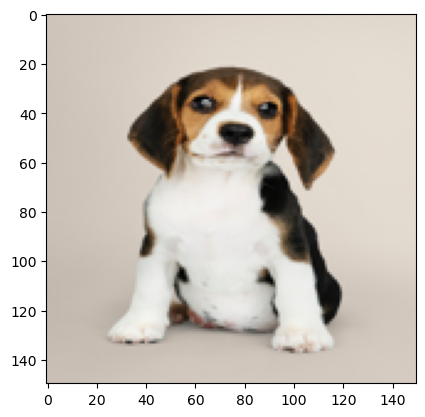

In [133]:
plt.imshow(img)
plt.show()

In [134]:
y_pred = model.predict(img.reshape(1, 150, 150, 3))

1/1 [==============================] - 0s 27ms/step


In [135]:
y_pred = y_pred > 0.5
if(y_pred == 0):
    pred = 'cat'
else:
    pred = 'dog'
print('our model says it is a:',pred)

our model says it is a: dog
